<a href="https://colab.research.google.com/github/thakurakanksha288/learning_ml/blob/main/fcc_bikes_regression_day3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
import copy
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
#importing dataset
dataset_cols=["bike_count","hour","temp","humidity","wind","visibility","dew_pt_temp","radiation","rain","snow","functional"]
df=pd.read_csv("/content/SeoulBikeData.csv", encoding='latin1')
df=df.drop(["Date","Holiday","Seasons"],axis=1)

In [4]:
df.columns=dataset_cols
df["functional"]=(df["functional"]=="Yes").astype(int)
df=df[df["hour"]==12]
df=df.drop(["hour"],axis=1)

In [5]:
df.head()

,bike_count,temp,humidity,wind,visibility,dew_pt_temp,radiation,rain,snow,functional
12,449,1.7,23,1.4,2000,-17.2,1.11,0.0,0.0,1
36,479,4.3,41,1.3,1666,-7.8,1.09,0.0,0.0,1
60,333,5.8,85,1.7,349,3.4,0.43,0.0,0.0,1
84,393,-0.3,38,4.8,1823,-12.9,1.11,0.0,0.0,1
108,321,-2.3,25,0.0,1962,-19.7,0.00,0.0,0.0,1


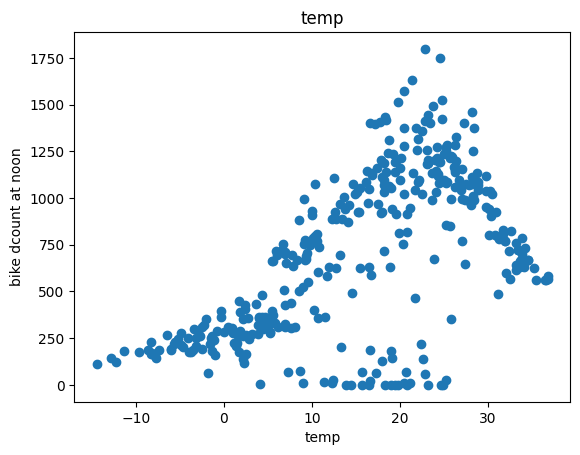

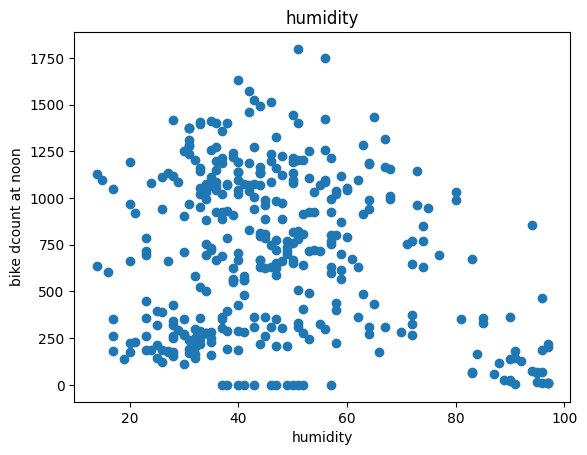

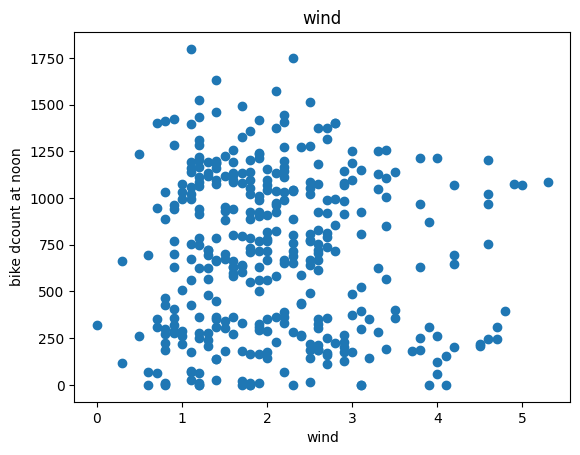

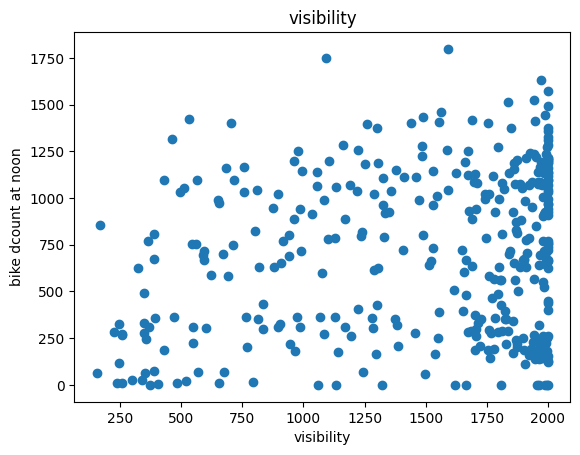

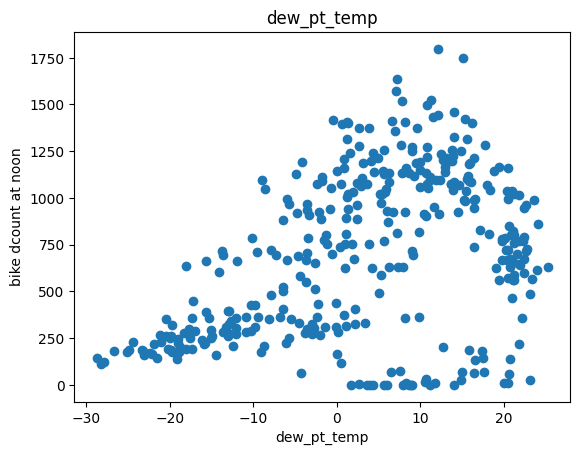

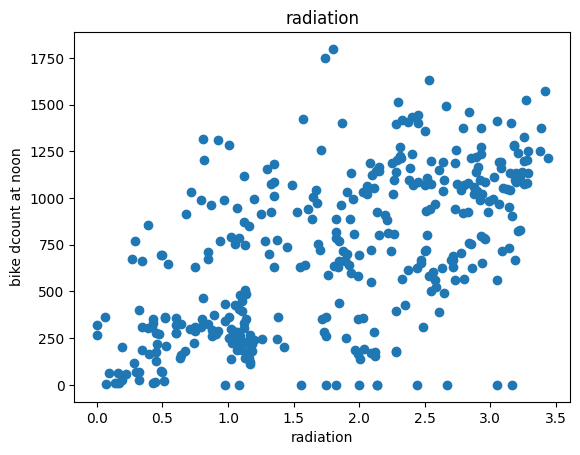

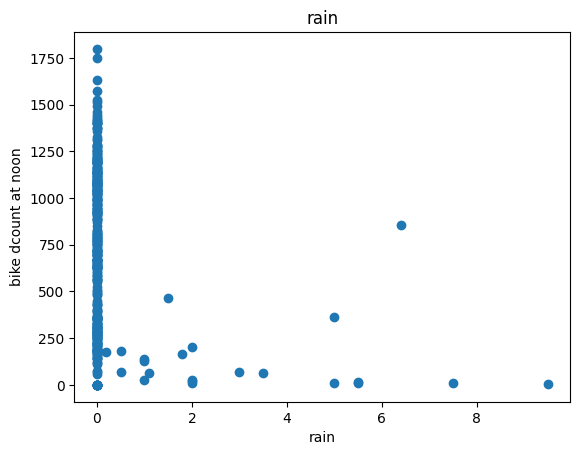

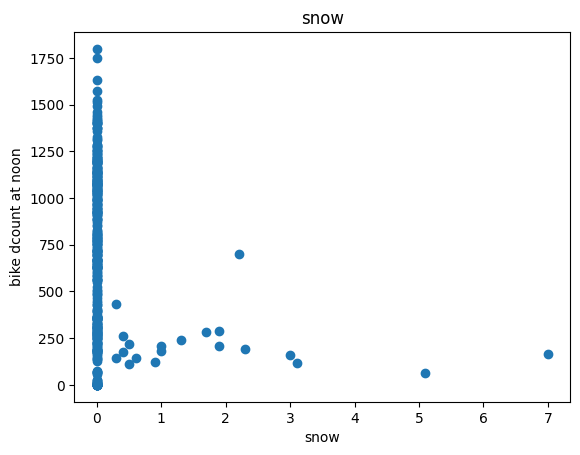

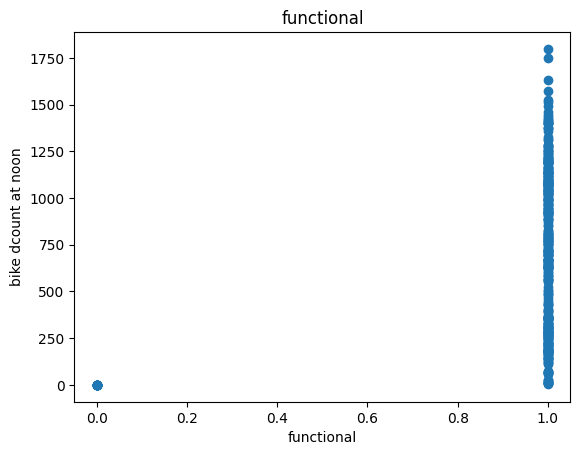

In [6]:
for label in df.columns[1:]:
  plt.scatter(df[label],df["bike_count"])
  plt.title(label)
  plt.ylabel('bike dcount at noon')
  plt.xlabel(label)
  plt.show()

In [7]:
df=df.drop(["wind","visibility","functional"],axis=1)

In [8]:
df.head()

,bike_count,temp,humidity,dew_pt_temp,radiation,rain,snow
12,449,1.7,23,-17.2,1.11,0.0,0.0
36,479,4.3,41,-7.8,1.09,0.0,0.0
60,333,5.8,85,3.4,0.43,0.0,0.0
84,393,-0.3,38,-12.9,1.11,0.0,0.0
108,321,-2.3,25,-19.7,0.00,0.0,0.0


In [9]:
#train/valid/test/dataset

train,val,test=np.split(df.sample(frac=1),[int(0.6*len(df)),int(0.8*len(df))])

/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [17]:
def get_xy(dataframe,y_label,x_labels=None):
 dataframe=copy.deepcopy(dataframe)
 if x_labels is None:
    X=dataframe[[c for c in dataframe.columns if c!=y_label]].values
 else:
    if len(x_labels)==1:
      X=dataframe[[x_labels[0]]].values # Ensure X is 2D (N, 1)
    else:
        X=dataframe[x_labels].values
 y=dataframe[y_label].values.reshape(-1, 1) # Reshape y to be a 2D column vector (N, 1)

 # Now X and y are both 2D arrays, compatible for hstack
 data=np.hstack((X,y))

 return data,X,y

In [18]:
_,X_train_temp,y_train_temp=get_xy(train,"bike_count",x_labels=["temp"])
_,X_val_temp,y_val_temp=get_xy(val,"bike_count",x_labels=["temp"])
_,X_test_temp,y_test_temp=get_xy(test,"bike_count",x_labels=["temp"])

In [19]:
X_train_temp

array([[  3.9],
       [ 16.5],
       [ -4.9],
       [ 32.4],
       [ 20.8],
       [  5.2],
       [ 10. ],
       [ 16.7],
       [ 22.1],
       [  1. ],
       [  4. ],
       [ 14.7],
       [ 10.6],
       [ 24.8],
       [ 29.8],
       [ -1.3],
       [ 33.4],
       [ 25.2],
       [ 24.1],
       [ 32.5],
       [ -7.8],
       [ 15.7],
       [ 20. ],
       [ 19.8],
       [  4.5],
       [  7.1],
       [ -2.5],
       [ 34.1],
       [ 16.6],
       [ 27.3],
       [  4.8],
       [  0.5],
       [  1.1],
       [ 29.8],
       [  7.6],
       [  2.2],
       [  6.9],
       [ 28.9],
       [ 12.7],
       [ 16.8],
       [ 23.2],
       [ 25.4],
       [ 24.7],
       [  2.9],
       [ -1. ],
       [ 20.5],
       [-12.8],
       [ 23.8],
       [ -7.3],
       [ 33.4],
       [ 18.2],
       [ 24.8],
       [ 32. ],
       [  9. ],
       [ 30.1],
       [  5.8],
       [  4.3],
       [  3.2],
       [ 13.9],
       [ 27. ],
       [ 20. ],
       [ 19.4],
       [

In [20]:
temp_reg=LinearRegression()
temp_reg.fit(X_train_temp,y_train_temp)


LinearRegression()

In [21]:
print(temp_reg.coef_,temp_reg.intercept_)


[[22.73108929]] [374.09687723]


In [22]:
temp_reg.score(X_test_temp,y_test_temp)

0.2081677272733926

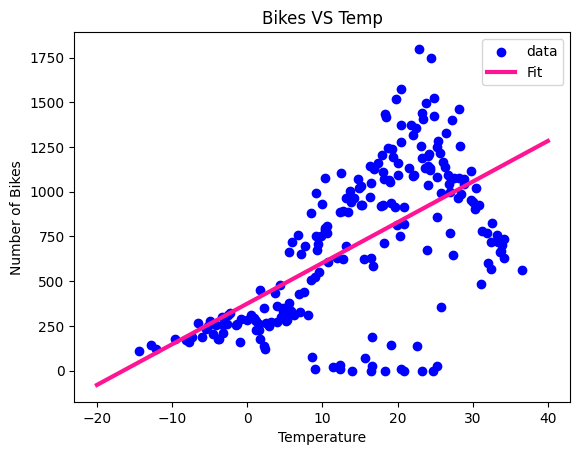

In [25]:
plt.scatter(X_train_temp,y_train_temp,label="data",color="blue")
x=tf.linspace(-20,40,100)
plt.plot(x,temp_reg.predict(x[:,np.newaxis]),label="Fit",color="deeppink",linewidth=3)
plt.legend()
plt.title("Bikes VS Temp")
plt.ylabel("Number of Bikes")
plt.xlabel("Temperature")
plt.show()

In [26]:
df.columns

Index(['bike_count', 'temp', 'humidity', 'dew_pt_temp', 'radiation', 'rain',
       'snow'],
      dtype='object')

In [29]:
#multiple linear regression
train,val,test=np.split(df.sample(frac=1),[int(0.6*len(df)),int(0.8*len(df))])
_,X_train_all,y_train_all=get_xy(train,"bike_count",x_labels=df.columns[1:])
_,X_val_all,y_val_all=get_xy(val,"bike_count",x_labels=df.columns[1:])
_,X_test_all,y_test_all=get_xy(test,"bike_count",x_labels=df.columns[1:])


/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [30]:
all_reg=LinearRegression()
all_reg.fit(X_train_all,y_train_all)

LinearRegression()

In [31]:
all_reg.score(X_test_all,y_test_all)

0.39214238797592427

In [71]:
y_pred_lr=all_reg.predict(X_test_all,)

array([[ 233.1891415 ],
       [1044.4744884 ],
       [ 302.60273122],
       [ 678.22338008],
       [ 775.34838407],
       [ 946.60664293],
       [ 325.62996247],
       [ 263.13599431],
       [ 389.53196174],
       [ 837.36665207],
       [ 996.56828409],
       [1030.80610741],
       [ 674.5934694 ],
       [ 960.28099583],
       [ 402.86129917],
       [ 694.14247721],
       [ 766.52058239],
       [ 102.4097785 ],
       [ 186.77958165],
       [ 961.55138237],
       [ 382.76681959],
       [ 629.79155207],
       [ 302.8598689 ],
       [ 319.38269824],
       [ 575.48353153],
       [ 950.20157697],
       [1149.90850275],
       [ 516.68659063],
       [ 381.38641396],
       [ 355.71505391],
       [1230.32400954],
       [ 657.15073878],
       [  85.61872389],
       [1077.5360227 ],
       [ 759.00759432],
       [1188.59890609],
       [ 774.69294221],
       [ 652.75450093],
       [ 983.74831983],
       [1050.19088125],
       [ 997.10201938],
       [ 560.573

In [33]:
#regression with neural network

temp_normalizer=tf.keras.layers.Normalization(input_shape=(1,),axis=None)
temp_normalizer.adapt(X_train_temp.reshape(-1))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [34]:
temp_nn_model=tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(units=1)
])

In [35]:
temp_nn_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_squared_error')

In [38]:
history=temp_nn_model.fit(
    X_train_temp[:, 0].reshape(-1, 1),y_train_temp,
    verbose=0,epochs=100,
    validation_data=(X_val_temp[:, 0].reshape(-1, 1),y_val_temp
))

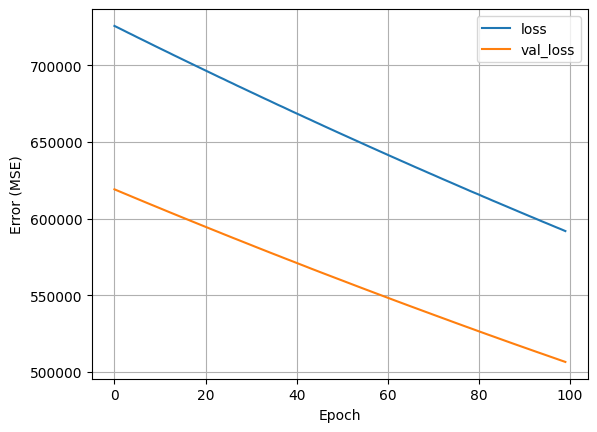

In [40]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Error (MSE)')
  plt.legend()
  plt.grid(True)
  plt.show()

plot_loss(history)

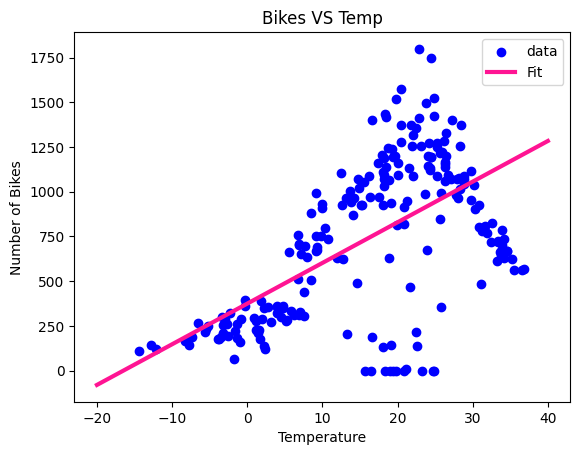

In [57]:
plt.scatter(X_train_temp[:, 0],y_train_temp,label="data",color="blue")
x=tf.linspace(-20,40,100)
plt.plot(x,temp_reg.predict(x[:,np.newaxis]),label="Fit",color="deeppink",linewidth=3)
plt.legend()
plt.title("Bikes VS Temp")
plt.ylabel("Number of Bikes")
plt.xlabel("Temperature")
plt.show()

In [51]:
#neural net
temp_normalizer=tf.keras.layers.Normalization(input_shape=(1,),axis=None)
temp_normalizer.adapt(X_train_temp.reshape(-1))

nn_model=tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(units=32,activation="relu"),
    tf.keras.layers.Dense(units=32,activation="relu"),
    tf.keras.layers.Dense(units=1,activation="relu"),
])
nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='mean_squared_error')

In [68]:
history=nn_model.fit(
    X_train_temp, y_train_temp,
    verbose=0, epochs=100,
    validation_data=(X_val_temp[:, 0].reshape(-1, 1), y_val_temp)
)

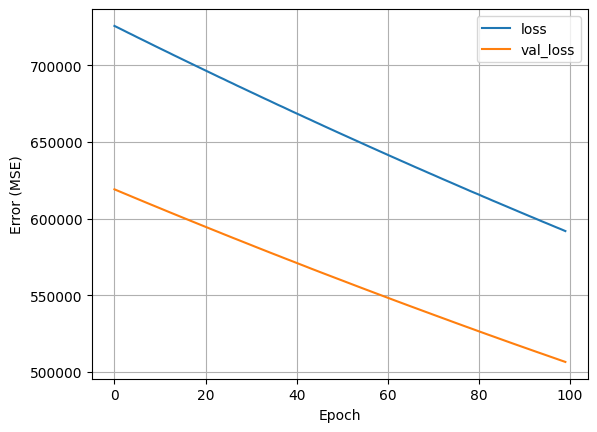

In [58]:
plot_loss(history)

In [66]:
all_normalizer=tf.keras.layers.Normalization(input_shape=(X_train_all.shape[1],),axis=-1)
all_normalizer.adapt(X_train_all)

nn_model=tf.keras.Sequential([
    all_normalizer,
    tf.keras.layers.Dense(units=32,activation="relu"),
    tf.keras.layers.Dense(units=32,activation="relu"),
    tf.keras.layers.Dense(units=1,activation="relu"),
])
nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='mean_squared_error')

/usr/local/lib/python3.12/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [69]:
history=nn_model.fit(
    X_train_all, y_train_all,
    validation_data=(X_val_all, y_val_temp),
    verbose=0, epochs=100
)

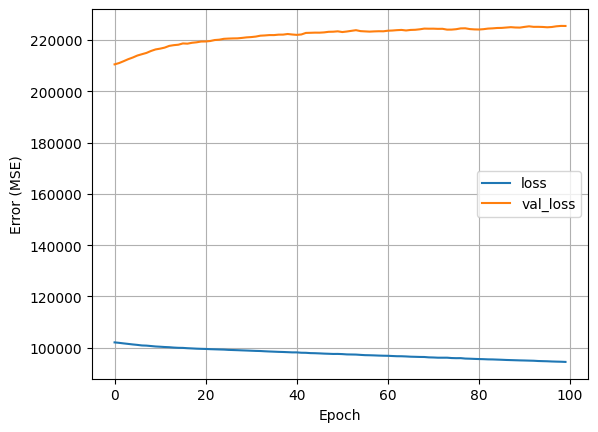

In [70]:
plot_loss(history)

In [72]:
y_pred_lr=all_reg.predict(X_test_all,)
y_pred_nn=nn_model.predict(X_test_all,)
#calculation of the mean square error for both linear reg and nn

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


In [73]:
def MSE(y_pred,y_real):
  return (np.square(y_pred - y_real)).mean()

In [75]:
MSE(y_pred_lr,y_test_all)

np.float64(101010.7917187819)

In [76]:
MSE(y_pred_nn,y_test_all)

np.float64(95187.99621524902)

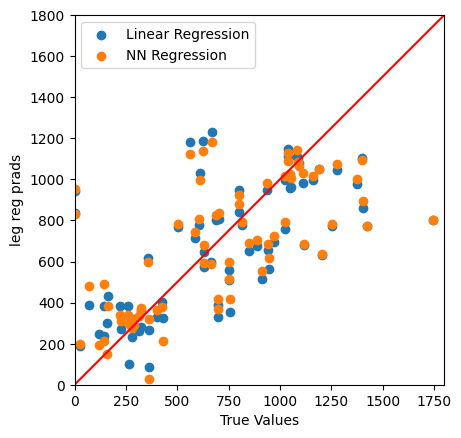

In [79]:
ax=plt.axes(aspect='equal')
plt.scatter(y_test_all,y_pred_lr,label="Linear Regression")
plt.scatter(y_test_all,y_pred_nn,label="NN Regression")
plt.xlabel("True Values")
plt.ylabel("leg reg prads")
lims=[0,1800]
plt.xlim(lims)
plt.ylim(lims)
plt.legend()
_=plt.plot(lims,lims,c="red")